### 1. MUTUAL INFORMATION

##### STEP 1: STATISTIC DESCRIPTIVE

In [124]:
"""
Mutual information is a method to find out how much a information obtained from a feature/variable to define the other variables/feature. Commonly used to 
determine the correlation/relationship among features either linear or non-linear correlation

1. MI only threat differently with discrete (integer or categorial value, ie: the number of students) and continues data (any value range interval, ex: the speed of car). 
For discreate it must be encoded, whereas continues must be normalized
"""
import pandas as pd

df = pd.read_csv(r'D:\TheCoder\Kaggle\datasets\Automobile_data.csv')

In [125]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [127]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


##### STEP 2: EXPLORATORY & PREPROCESSING

In [162]:
# check weired value
def check_weired():
    for col in df.select_dtypes(include=['object', 'int64', 'float64']).columns:
        print(f"Column '{col}' has unique: {df[col].unique()}")

In [ ]:
check_weired()

##### STEP 3: CLEANSING (IMPUTE) THE WEIRED VALUES

In [137]:
# replace first the '?' to NaN so it can be proceded further
import numpy as np
df.replace('?', np.nan, inplace=True)

In [159]:
# for int datatypes impute NaN with mean
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].mean())  # Isi NaN dengan mean


In [156]:
# for int datatypes impute NaN with mean
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Isi NaN dengan mean


In [163]:
check_weired()

Column 'symboling' has unique: [ 3  1  2  0 -1 -2]
Column 'normalized-losses' has unique: ['161' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '142' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
Column 'make' has unique: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column 'fuel-type' has unique: ['gas' 'diesel']
Column 'aspiration' has unique: ['std' 'turbo']
Column 'num-of-doors' has unique: ['two' 'four']
Column 'body-style' has unique: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column 'drive-wheels' has unique: ['rwd' 'fwd' '4wd']
Column 'engine-location' has unique: ['front' 'rear']
Column 'wheel-base' has uniqu

##### STEP 4: PROCESS OF MI

##### 4A. Convert to Discrete Through Encoding

In [164]:
# separate the X features and y target
X = df.copy()
y = X.pop('price')
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22


In [165]:
# get only the discrete values and encoded it
from sklearn.preprocessing import LabelEncoder # for ordninal encoding (categorical). The order is meaningfull

for colname in X.select_dtypes(include=['object']): # change only object in order it become encoded (int)
     enc = LabelEncoder()
     X[colname] = enc.fit_transform(X[colname])
X.head() # now object encoded which mean it become int

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,26,0,1,0,1,0,2,0,88.6,...,2,130,5,23,4,9.0,5,10,21,27
1,3,26,0,1,0,1,0,2,0,88.6,...,2,130,5,23,4,9.0,5,10,21,27
2,1,26,0,1,0,1,2,2,0,94.5,...,3,152,5,1,27,9.0,20,10,19,26
3,2,27,1,1,0,0,3,1,0,99.8,...,2,109,5,13,24,10.0,2,16,24,30
4,2,27,1,1,0,0,3,0,0,99.4,...,1,136,5,13,24,8.0,8,16,18,22


In [166]:
discrete_features = X.dtypes == 'int64'
discrete_features

symboling             True
normalized-losses     True
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight           True
engine-type           True
num-of-cylinders      True
engine-size           True
fuel-system           True
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg              True
highway-mpg           True
dtype: bool

##### 4B. Calculate the MI Scores

In [169]:
# calculate the MI. 
"""Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and 
one for categorical targets (mutual_info_classif). Our target, price, is real-valued. The next cell computes the MI scores for 
our features and wraps them up in a nice dataframe."""

from sklearn.feature_selection import mutual_info_regression

def generate_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
test = generate_mi_scores(X, y, discrete_features)
test

curb-weight          1.345675
horsepower           1.190958
engine-size          0.969467
highway-mpg          0.922288
city-mpg             0.807492
stroke               0.716860
width                0.641662
bore                 0.640905
normalized-losses    0.617897
length               0.559558
wheel-base           0.548345
make                 0.547471
fuel-system          0.442090
peak-rpm             0.420704
height               0.335313
drive-wheels         0.331458
num-of-cylinders     0.315044
compression-ratio    0.241370
symboling            0.205701
engine-type          0.155488
aspiration           0.085836
body-style           0.070729
fuel-type            0.039231
engine-location      0.035099
num-of-doors         0.000000
Name: MI Scores, dtype: float64

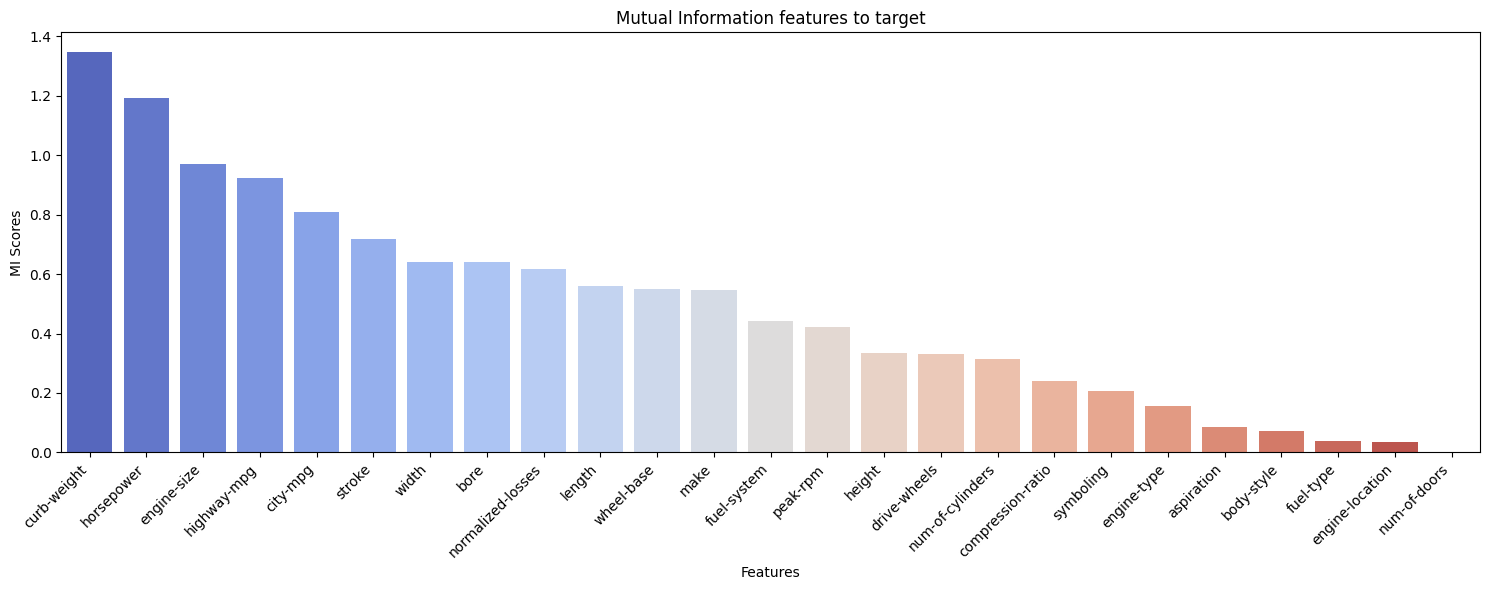

In [206]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=test.index, y=test.values, hue=test.index, palette="coolwarm")
plt.title('Mutual Information features to target')
plt.xlabel('Features')
plt.ylabel('MI Scores')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()